<a href="https://colab.research.google.com/github/Varshini151205/ML/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Linear regression**

In [ ]:
import pandas as pd

In [ ]:
#load data
data=pd.read_csv("/content/drive/MyDrive/ml lab /house_price_train.csv")
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
#data
X=data[['YearBuilt']]
Y=data[['SalePrice']]

In [ ]:
#test and train split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#fit
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
#prediction
Y_pred = model.predict(X_test)

In [ ]:
#print(X.columns)
#print(model.n_features_in_)


In [ ]:
#prediction on new data
new_house = pd.DataFrame({'YearBuilt': [2005]})
predicted_price = model.predict(new_house)[0][0]



In [ ]:
print("MAE:", mean_absolute_error(Y_test, Y_pred))
print("MSE:", mean_squared_error(Y_test, Y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("R2:", r2_score(Y_test, Y_pred))

MAE: 51148.46731516804
MSE: 5447834477.467489
RMSE: 73809.44707466307
R2: 0.28975191793500943


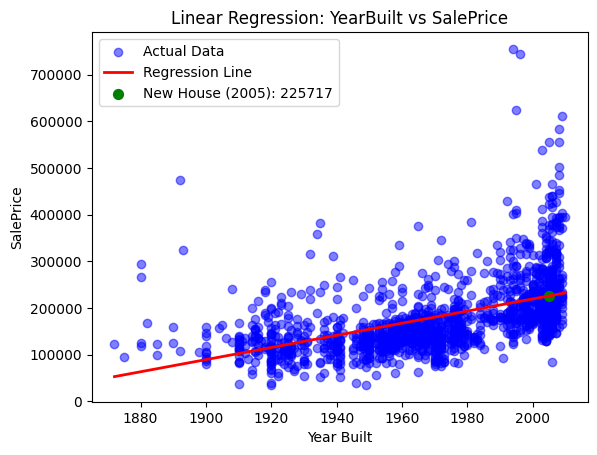

Predicted Price for YearBuilt=2005: 225717.74853491038


In [ ]:
X_sorted = X.sort_values(by="YearBuilt")
Y_sorted_pred = model.predict(X_sorted)

# Scatter actual data
plt.scatter(X, Y, color='blue', alpha=0.5, label="Actual Data")

# Regression line
plt.plot(X_sorted, Y_sorted_pred, color='red', linewidth=2, label="Regression Line")

# Plot new house point
plt.scatter(new_house['YearBuilt'], predicted_price,
            color='green', s=200, marker='.',
            label=f"New House (2005): {int(predicted_price)}")

# Labels and legend
plt.xlabel("Year Built")
plt.ylabel("SalePrice")
plt.title("Linear Regression: YearBuilt vs SalePrice")
plt.legend()
plt.show()

print("Predicted Price for YearBuilt=2005:", predicted_price)

### **Polynomial regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ml lab /house_price_train.csv")
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [ ]:
# Selecting numeric features
X = df[["GrLivArea", "OverallQual", "TotalBsmtSF", "GarageArea"]]
y = df["SalePrice"]


In [ ]:
# Create polynomial features (degree=2 means quadratic)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print("Original Shape:", X.shape)
print("After Polynomial Transformation:", X_poly.shape)


Original Shape: (1460, 4)
After Polynomial Transformation: (1460, 14)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.8591210546797761
MSE: 1080587466.330596


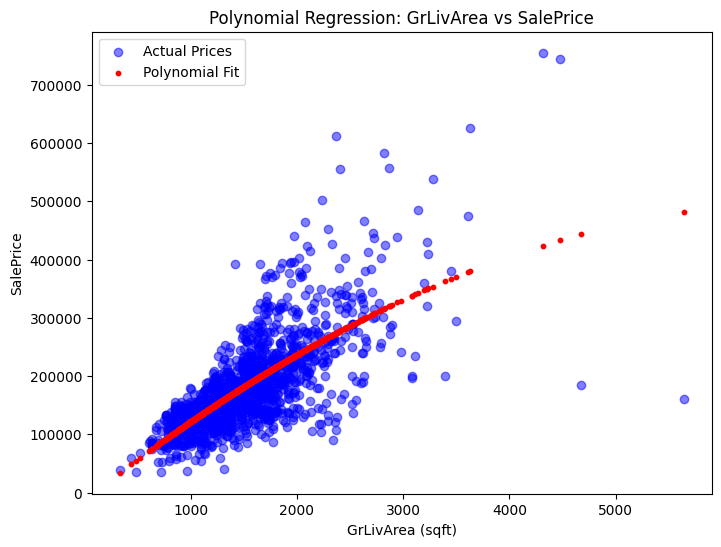

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ml lab /house_price_train.csv")

# Select one feature and target
X = df[["GrLivArea"]]
y = df["SalePrice"]


poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)

# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Actual Prices")
plt.scatter(X, y_pred, color="red", s=10, label="Polynomial Fit")
plt.xlabel("GrLivArea (sqft)")
plt.ylabel("SalePrice")
plt.title("Polynomial Regression: GrLivArea vs SalePrice")
plt.legend()
plt.show()


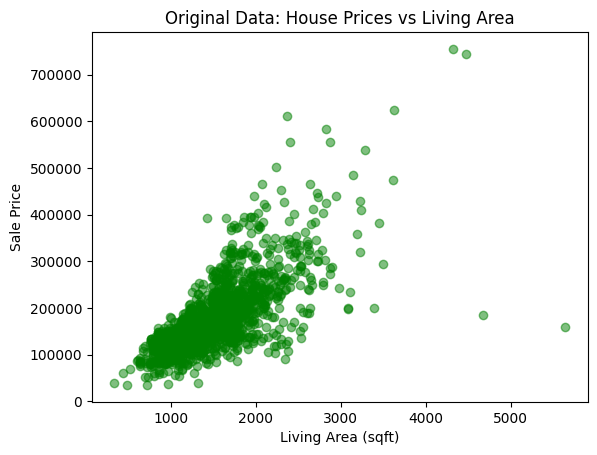

   Actual Values  Predicted Values
0         208500     205632.512903
1         181500     154074.370239
2         223500     213970.770792
3         140000     206405.461293
4         250000     257111.997140
5         143000     165939.598856
6         307000     203862.001571
7         200000     246139.673783
8         129900     212662.076080
9         118000     131583.243881
R² Score: 0.508504842437747


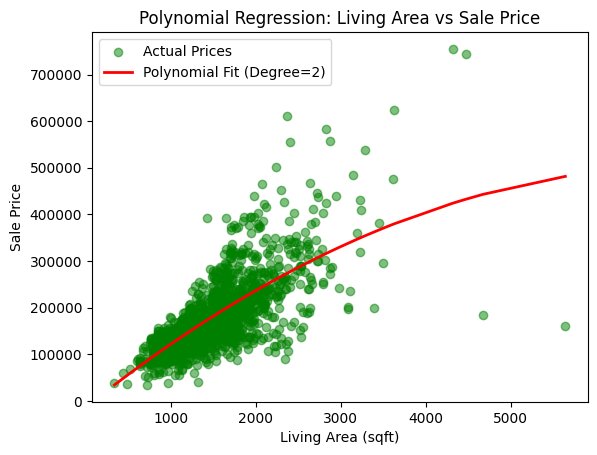

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/ml lab /house_price_train.csv")

# Select feature and target
X = data[["GrLivArea"]].values
y = data["SalePrice"].values

# Scatter plot (original data)
plt.scatter(X, y, color="green", alpha=0.5)
plt.title("Original Data: House Prices vs Living Area")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Sale Price")
plt.show()

# Polynomial transformation (degree = 2)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_poly, y)

# Predictions
y_pred = lr_model.predict(X_poly)

# Show Actual vs Predicted
df = pd.DataFrame({'Actual Values': y, 'Predicted Values': y_pred})
print(df.head(10))   # show first 10 for clarity

# Evaluate R² score
r2 = r2_score(y, y_pred)
print("R² Score:", r2)

# Plot Polynomial Regression Curve
X_sorted = np.sort(X, axis=0)
y_sorted_pred = lr_model.predict(poly_features.transform(X_sorted))

plt.scatter(X, y, color="green", alpha=0.5, label="Actual Prices")
plt.plot(X_sorted, y_sorted_pred, color="red", linewidth=2, label=f"Polynomial Fit (Degree={degree})")
plt.title("Polynomial Regression: Living Area vs Sale Price")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Sale Price")
plt.legend()
plt.show()
